<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Импорт библиотек**

In [1]:
import os #импорт библиотеки os (для проверки существования пути к файлу)
import math #импорт библиотеки math (для использования рандома)
import datetime #импорт библиотеки datetime (для актуальной даты и преобразования формата для шифрвоания)

import pandas as pd #импорт библиотеки pandas (работа с таблицами)
import numpy as np #импорт библиотеки numpy (вычисления)
import matplotlib.pyplot as plt #импорт библиотеки matplotlib (графика)
from sklearn.metrics import r2_score #импорт метрики R2 (оценка качества предсказаний)

## Загрузка и изучение данных

**Загрузка данных**

In [2]:
#путь для ревью
pth1='/datasets/insurance.csv'

#путь для работы
pth2='insurance.csv'

#выбор пути если он существует методом os
if os.path.exists(pth1):
    #загрузка данных методом read_csv
    df=df=pd.read_csv(pth1)
elif os.path.exists(pth2):
    df=df=pd.read_csv(pth2)
else:
    print('Something is wrong')

**Изучение данных**

Посмотрим на импортированный датасет различными методами.

In [3]:
#вызов информации о датасете методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Отсюда видно: количество строк - 5000, пропусков нет. По условию задачи, столбцы пол, возраст, зарплата, члены семьи (количество членов семьи) - это признаки, а целевой признак - страховые выплаты (количество страховых выплат за последние 5 лет).

In [4]:
#вызов информации методом describe()
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Отсюда видно, что:

    Количество мужчин/женщин одинаковое;
    Средний возраст - около 31 года;
    Разброс зарплат не очень большой: в пределах от 5300 до 79000, со средней в 39916;
    Количество членов семьи застрахованного в среднем 1.2, а в целом от 0 до 6;
    Страховые выплаты закономерно производятся редко: 0.75-квантиль - это 0. При этом есть люди, получившие выплату 5 раз.

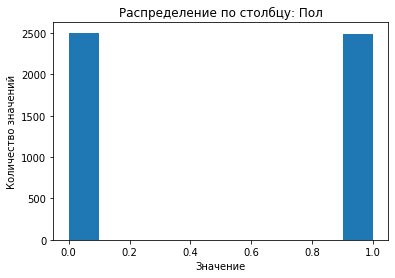

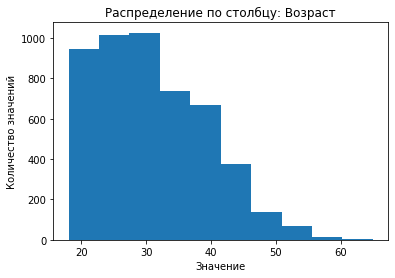

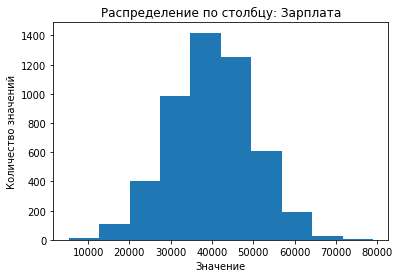

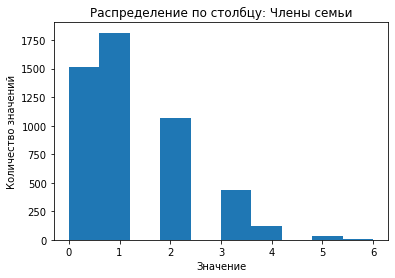

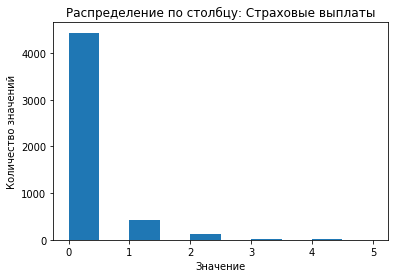

In [6]:
#вывод гистограмм распределений значений по столбцам

for i in df.columns:
    plt.hist(df[i])
    plt.xlabel('Значение')
    plt.ylabel('Количество значений')
    plt.title('Распределение по столбцу: '+i)
    plt.show()

В принципе здесь наглядно подтверждаются выводы, сделанные вызовом метода describe()

In [7]:
#вывод первых строк датасета методом head()
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Всё без сюрпризов. Невыясненными обстоятельствами остаются:

    Обозначение пола: 1 - это кто, а 0 - это кто? (в принципе в рамках задачи это неважно);
    Зачем/почему столбец Возраст имеет формат данных float, когда значения лет - целочисленные;
    Аналогично по зарплатам.

Преобразуем тип данных для столбца возраста и зарплаты.

In [8]:
#преобразование типа данных методом astype(int)
df['Возраст']=df['Возраст'].astype(int)
df['Зарплата']=df['Зарплата'].astype(int)

#вывод метода info() для проверки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


**Вывод по блоку 1. Загрузка и изучение данных**

    Пропуски - отсутствуют;
    Количество мужчин/женщин одинаковое (при этом неясно кто из них кто - 1 или 0, но это неважно);
    Средний возраст - около 31 года;
    Разброс зарплат не очень большой: в пределах от 5300 до 79000, со средней в 39916;
    Количество членов семьи застрахованного в среднем 1.2, а в целом от 0 до 6;
    Страховые выплаты закономерно производятся редко: 0.75-квантиль - это 0. При этом есть люди, получившие выплату 5 раз;
    Заменён тип данных float на int для столбцов Возраст, Зарплата

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Перейдём к обучению модели линейной регрессии. Сначала для исходных данных:

In [9]:
#разделение признаков
features_1=df.drop('Страховые выплаты',axis=1)
target_1=df['Страховые выплаты']

In [10]:
#определение класса линейной регрессии:
class LinearRegression:
    def fit(self,train_features,train_target):
        X=np.concatenate((np.ones((train_features.shape[0],1)),
                          train_features),axis=1)
        y=train_target
        w=np.linalg.inv(X.T@X)@X.T@y
        self.w=w[1:]
        self.w0=w[0]
        
    def predict(self,test_features):
        return test_features.dot(self.w)+self.w0
    


In [11]:
#обучение модели
model_1=LinearRegression()
model_1.fit(features_1,target_1)
predictions_1=model_1.predict(features_1)
r2_1=r2_score(target_1,predictions_1)
r2_1

0.42494550308169177

Качество предсказаний на обучающей выборке для исходных данных по критерию r2 = 0.42.

Теперь умножим матрицу признаков на обратимую матрицу и посмотрим на результат. Для этого используем инструмент numpy random nornal для создания обратимой матрицы размером 4х4 и прогоним цикл обучения и предсказания несколько раз.

In [12]:
r2_2=[]
r2_close=[]
r2_delta=[]
for i in range(10):
    #Подбор обратимой матрицы
    A=np.random.normal(0,10,(4, 4))
    #проверка матрицы на обратимость: вычисление определителя матрицы и сравнение с 0
    if np.linalg.det(A)!=0:
        #переопределение признаков
        features_2=features_1@A
        target_2=target_1

        #обучение модели
        model_2=LinearRegression()
        model_2.fit(features_2,target_2)
        predictions_2=model_2.predict(features_2)
        r2_2.append(r2_score(target_2,predictions_2))
        r2_delta.append(r2_2[i]/r2_1)
        r2_close.append(math.isclose(r2_2[i],r2_1,rel_tol=1e-15))
    else:
        print('матрица необратима')
print('R2 для предсказаний после умножения:',r2_2)
print()
print('Равны ли r2 до и после умножения?',r2_close)
print()
print('Соотношение r2 до и после умножения:',r2_delta)
    

R2 для предсказаний после умножения: [0.42494550308169243, 0.42494550308166246, 0.42494550308169143, 0.42494550308078216, 0.4249455030813464, 0.4249455030816943, 0.42494550308169365, 0.42494550308169254, 0.42494550308169143, 0.42494550308168944]

Равны ли r2 до и после умножения? [False, False, True, False, False, False, False, False, True, False]

Соотношение r2 до и после умножения: [1.0000000000000016, 0.999999999999931, 0.9999999999999992, 0.9999999999978595, 0.9999999999991872, 1.000000000000006, 1.0000000000000044, 1.0000000000000018, 0.9999999999999992, 0.9999999999999946]


In [13]:
features_2

,0,1,2,3
0,466739.368975,-196800.043294,-338084.259788,70153.544898
1,357785.961273,-150820.505492,-258911.641286,53684.340625
2,197786.535736,-83361.710754,-143046.439534,29660.528456
3,392172.011750,-165392.529536,-284346.506024,59004.752067
4,245711.687840,-103588.790297,-177851.776674,36904.289077
...,...,...,...,...
4995,335887.022654,-141633.768729,-243368.895503,50477.537203
4996,492940.730519,-207860.017973,-357224.243977,74133.082970
4997,318852.560572,-134467.241719,-231146.443984,47954.245791
4998,307596.349060,-129731.316224,-222976.082113,46249.997723


**Ответ:** Видно, что значения r2 получаются разными, однако, видимо, это идёт погрешность округлений в расчётах, так как порядок отличительных значений наблюдается на двеннадцатом знаке после запятой, и различия в реальности не существует. Проверим данное предположение:

**Обоснование:** 

Некоторые свойства матриц:

$$
(AB)^T=A^T B^T
$$

$$
(AB)^{-1}=A^{-1} B^{-1}
$$

$$
A A^{-1}= E
$$

$$
(ABC)^{-1}=C^{-1} B^{-1} A^{-1}  
$$
Произведём преобразование формул, раскрыв все скобки, используя упомянутые выше свойства матриц. Рассмотрим два случая: предсказания a для исходной матрицы X и предсказания a1 для матрицы X, умноженной на обратимую матрицу A:

Первый случай:
$$
a=Xw=X (X^T X)^{-1} X^T y
$$
Получается, предсказания a равны целевым признакам y, что логично: мы же обучаем модель на оубчающей выборке на целевом признаке, а затем используем w, при котором выполняется задача обучения (см. выше)

Теперь второй случай: матрица X умножается на обратимую матрицу A:

$$
a1=XAw1=XA ((XA)^T XA)^{-1} (XA)^T) y= XA(A^T X^T X A)^{-1}A^T X^T y= X A A^{-1} (X^T X)^{-1} (A^T)^{-1} A^T X^T y
=X E (X^T X)^{-1} E X^T y=X (X^T X)^{-1} X^T y
$$

Таким образом, a1=a вне зависимости от умножения матрицы признаков X на обратимую матрицу A.

## Алгоритм преобразования

**Алгоритм**

На основе проверки предыдущего пункта, предлагается алгоритм: умножение матрицы признаков на обратимую матрицу-ключ, затем обучение линейной регрессии, проверка r2_score, и уже после вернём значения признаков, умножив матрицу признаков на обратную матрицу-ключ. Для дополнительной "защиты" создадим ключ шифр следующим образом: матрицу-код умножим на значение, которое зависит от даты.

**Обоснование**

На основе предыдущей выкладки получено: умножение матрицы на обратимую и использовании уже умноенной матрицы признаков не влияет на качество предсказаний.

## Проверка алгоритма

In [14]:
#создание матрицы-ключа B
B=np.array([
    [-1,2,3,4],
    [2,3,4,5],
    [3,4,5,6],
    [4,5,6,3]
])
#проверка обратимости матрицы B
print(np.linalg.inv(B))

[[-5.00000000e-01  1.00000000e+00 -5.00000000e-01  1.80411242e-16]
 [ 1.00000000e+00 -7.25000000e+00  5.50000000e+00 -2.50000000e-01]
 [-5.00000000e-01  5.50000000e+00 -4.50000000e+00  5.00000000e-01]
 [ 1.11022302e-16 -2.50000000e-01  5.00000000e-01 -2.50000000e-01]]


In [15]:
#редактирование матрицы-ключа умножением (не скалярным) на преобразованное значение даты
#выбор сегодняшней даты
today=datetime.date.today()
#преобразование datetime в число с разделением значения года на произведение месяца и числа
today_code=int(today.strftime('%Y'))/(100*int(today.strftime('%m')*int(today.strftime('%d'))))
#умножение B на абракадабру из числа today_code
B=B*today_code

In [16]:
today_code

3.337950000003338e-10

In [17]:
#разделение признаков
features_3=features_1@B
target_3=target_1

In [18]:
#обучение модели
model_3=LinearRegression()
model_3.fit(features_3,target_3)
predictions_3=model_3.predict(features_3)
r2_3=r2_score(target_3,predictions_3)
r2_3_close=math.isclose(r2_3,r2_1)
print('R2 для предсказаний после умножения:',r2_3)
print()
print('Равны ли r2 до и после умножения?',r2_3_close)

R2 для предсказаний после умножения: 0.4249455030591054

Равны ли r2 до и после умножения? True


Теперь посмотрим на признаки, которые были изначально и зашифрованные:

In [19]:
pd.DataFrame(np.concatenate((features_1,features_3),axis=1)).head(10)

,0,1,2,3,4,5,6,7
0,1.0,41.0,49600.0,1.0,0.000050,0.000066,0.000083,0.000099
1,0.0,46.0,38000.0,1.0,0.000038,0.000051,0.000063,0.000076
2,0.0,29.0,21000.0,0.0,0.000021,0.000028,0.000035,0.000042
3,0.0,21.0,41700.0,2.0,0.000042,0.000056,0.000070,0.000084
4,1.0,28.0,26100.0,0.0,0.000026,0.000035,0.000044,0.000052
5,1.0,43.0,41000.0,2.0,0.000041,0.000055,0.000068,0.000082
6,1.0,39.0,39700.0,2.0,0.000040,0.000053,0.000066,0.000080
7,1.0,25.0,38600.0,4.0,0.000039,0.000052,0.000064,0.000077
8,1.0,36.0,49700.0,1.0,0.000050,0.000066,0.000083,0.000100
9,1.0,32.0,51700.0,1.0,0.000052,0.000069,0.000086,0.000104


Как видно, шифрование удалось: столбцы 4,5,6,7 не информативны как (Пол, Возраст, Зарплата,Члены семьи), однако, это не влияет на качество предсказаний, и с таким преобразованием можно использовать данные.

Посмотрим теперь на соотношение признаков, если мы знаем матрицу-ключ и хотим проверить настоящие данные:

In [20]:
pd.DataFrame(np.concatenate((features_1,round(features_3@np.linalg.inv(B))),axis=1))

,0,1,2,3,4,5,6,7
0,1.0,41.0,49600.0,1.0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0,-0.0,29.0,21000.0,-0.0
3,0.0,21.0,41700.0,2.0,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0,1.0,28.0,26100.0,0.0
...,...,...,...,...,...,...,...,...
4995,0.0,28.0,35700.0,2.0,-0.0,28.0,35700.0,2.0
4996,0.0,34.0,52400.0,1.0,-0.0,34.0,52400.0,1.0
4997,0.0,20.0,33900.0,2.0,-0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0,1.0,22.0,32700.0,3.0


Как видно, данные совпадают (с учётом округлений) Алгоритм можно использовать.

**Общий вывод**

Для выполнения задачи шифрования таблицы признаков-личных данных для дальнейшего использования для предсказания получения страховых выплат применён алгоритм, который умножает исходные данные на матрицу-ключ, которая умножена на число, зависящее от даты.

Доказано, что при использовании модели Линейной регрессии, эти преобразования не оказывают влияния на качество предсказаний.


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования